# Лабораторная работа №3

ФИО:  **указать**   
Группа: **указать**  

Отправлять можно следующими способами (**обязательно указать свое ФИО и группу в каком-либо виде**):
1. Создать **приватный** репозиторий на github, добавить меня по нику (l3lush) в Collaborators (Settings -> Collaborators -> Add people)
2. Отправить заполненный ноутбук мне на почту avmysh@gmail.com, либо m1603956@edu.misis.ru
3. Отправить заполненный ноутбук мне в тг @l3lush. 

**Deadlines**:
- soft -- **16.04.2023 23:59** (за сдачу в пределах этого времени +1 балл в табличку)
- hard -- **30.04.2023 23:59**


**Что необходимо сделать**:
1. Заполнить все ячейки ниже кодом так, чтобы прошли все `assert`ы.
2. **Побороть качество моей модели** (в конце ноутбука)


**P.S. Используйте части кода с прошлой лабы для forward pass**

Сначала импортируем нужные библиотеки  
Если чего-то нет локально, можно установить через pip install

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

# Задача 1. Реализовать слой с функцией активации "сигмоида"

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)

Формула сигмоиды:
$$
f(x) = \frac {1}{1 + e^{-x}}
$$

In [2]:
class SigmoidLayer():
    def __init__(self):
        self.params = []
        self.gradInput = None
        pass

    def forward(self, X):
        self.X = X.copy()
        output = 1 / (1 + np.exp(-X))
        return output
        pass
    
    def backward(self, dout):
        sigmoidOutput = self.forward(self.X)
        dX = sigmoidOutput * (1 - sigmoidOutput) * dout
        self.gradInput = dX
        return self.gradInput, []
        pass

In [3]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
sigmoid = SigmoidLayer()
output = sigmoid.forward(X)
correct_answer = np.array([[0.57313782, 0.62961995, 0.54773438],
                           [0.51696857, 0.68718368, 0.65843628],
                           [0.65419284, 0.64005501, 0.50976449],
                           [0.58851107, 0.7202462 , 0.51500666],
                           [0.70350447, 0.70626044, 0.51279562]])
assert np.isclose(output[:5], correct_answer).all()
assert hasattr(sigmoid, "params"), "Нет параметра params в реализованном классе"
assert hasattr(sigmoid, "gradInput"), "Нет параметра gradInput в реализованном классе"
assert hasattr(sigmoid, "X"), "Не сохранили X в реализованном классе"


dout = np.random.random(size=(100, 3))
dInput, _ = sigmoid.backward(dout)
correct_dInput = np.array([[0.19460589, 0.20407074, 0.17488009],
                           [0.1656316 , 0.10298473, 0.08073351],
                           [0.21590141, 0.1403435 , 0.21416212],
                           [0.21320927, 0.03610846, 0.05416308],
                           [0.00737656, 0.03121984, 0.02882668]])
assert np.isclose(dInput[:5], correct_dInput).all()

# Задача 2. Реализовать слой с активацией гиперболического тангенса

![](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-27_at_4.23.22_PM_dcuMBJl.png)

In [6]:
class TanhLayer():
    def __init__(self):
        self.params = []
        self.gradInput = None
        pass

    def forward(self, X):
        self.X = X.copy()
        output = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))
        return output
        pass
    
    def backward(self, dout):
        tanhOutput = self.forward(self.X)
        dX = (1 - tanhOutput ** 2) * dout
        self.gradInput = dX
        return self.gradInput, []
        pass

In [7]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
tanh = TanhLayer()
output = tanh.forward(X)
correct_answer = np.array([[0.28642281, 0.48582948, 0.18921297],
                           [0.0677962 , 0.65669792, 0.57591821],
                           [0.5632092 , 0.51946218, 0.03904306],
                           [0.34328675, 0.73782249, 0.05997262],
                           [0.69833441, 0.70505935, 0.05114899]])
assert np.isclose(output[:5], correct_answer).all()
assert hasattr(tanh, "params"), "Нет параметра params в реализованном классе"
assert hasattr(tanh, "gradInput"), "Нет параметра gradInput в реализованном классе"
assert hasattr(tanh, "X"), "Не сохранили X в реализованном классе"


dout = np.random.random(size=(100, 3))
dInput, _ = tanh.backward(dout)
correct_dInput = np.array([[0.7301867 , 0.66854527, 0.68068037],
                           [0.66024164, 0.27247731, 0.23991181],
                           [0.65163784, 0.44479135, 0.85566899],
                           [0.77667226, 0.08164937, 0.21606773],
                           [0.01811832, 0.07567937, 0.11508041]])
assert np.isclose(dInput[:5], correct_dInput).all()

# Задача 3. Реализовать функцию потерь MSE

В качестве интерактива-микрозадания, поищите формулу MSE в гугле 😊

In [10]:
class MSELoss():
    def forward(self, y_true, y_pred):
        n = len(y_true)
        loss = (1 / n) * np.sum((y_true - y_pred) ** 2)
        return loss
        pass
    
    def backward(self, y_true, y_pred):
        n = len(y_true)
        loss = (2 / n) * (y_pred - y_true)
        return loss
        pass

In [11]:
np.random.seed(17)

y_true = np.random.randint(0, 1000, size=(100))
y_pred = np.random.randint(0, 1000, size=(100))
mse = MSELoss()
output = mse.forward(y_true, y_pred)
correct_answer = 157953.51
assert round(output) == round(correct_answer)

dout = mse.backward(y_true, y_pred)
right_dout = np.array([3.56, 1.24, 10.2, 7.68, 3.02, 9.04, -12.84, -2.16, 3.04, 0.24])
assert np.isclose(dout[:10], right_dout).all()
assert round(dout.sum(), 3) == 19.26

# Задача 4. Реализовать каркас нейросети

In [16]:
class LinearLayer:
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size)
        self.params = [self.W]
        self.gradW = None
        self.gradInput = None
        
    def forward(self, X):
        self.X = X.copy()
        output = X.dot(self.W)
        return output
    
    def backward(self, dout):
        self.gradW = self.X.T.dot(dout)
        self.gradInput = dout.dot(self.W.T)
        return self.gradInput, [self.gradW]


class NN:
    def __init__(self, loss_func):
        self.layers = []
        self.params = []
        self.grads = []
        self.loss_func = loss_func
        pass

    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)
        pass

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
            print(X) 
        return X
        pass
    
    def backward(self, dout):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            dout, grad = layer.backward(dout)
            self.grads.append(grad)
        return self.grads

    def train_step(self, X, y):
        output = self.forward(X)
        loss = self.loss_func.forward(y, output)
        gradsLoss = self.loss_func.backward(y, output)
        grads = self.backward(gradsLoss)
        return loss, grads

    def predict(self, X):
        pred = self.forward(X)
        return pred
        pass
    
    def dispGradParam():
        print(self.grads)
    
    def clear_grad_param(self):
        self.grads = []
    
    
nn = NN(MSELoss())

assert hasattr(nn, "layers")
assert hasattr(nn, "params")
assert hasattr(nn, "grads")
assert hasattr(nn, "loss_func")
assert isinstance(nn.loss_func, MSELoss)

In [17]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
nn = NN(MSELoss())

linear1 = LinearLayer(3, 5)
nn.add_layer(linear1)

sigmoid1 = SigmoidLayer()
nn.add_layer(sigmoid1)

linear2 = LinearLayer(5, 1)
nn.add_layer(linear2)

sigmoid2 = SigmoidLayer()
nn.add_layer(sigmoid2)

output_nn = nn.forward(X)

assert round(output_nn.sum()) == 65


y = np.random.randint(0, 2, size=100).reshape(-1, 1)

nn_predict = nn.predict(X)
assert (output_nn == nn.predict(X)).all()

loss, grads = nn.train_step(X, y)
right_loss = np.array([0.24705916])

assert np.isclose(loss, right_loss)
assert grads[0] == []
assert round(grads[1][0].sum(), 4) == 0.0394
assert grads[2] == []
assert round(grads[3][0].sum(), 4) == 0.0077

[[-7.34214336e-02  2.19697695e-01  9.21561730e-01 -1.11175540e-02
  -8.94952944e-01]
 [-2.30342032e-01  3.77309638e-01  1.69801687e+00 -6.83171591e-01
  -3.69285684e-01]
 [ 2.61724922e-02  2.55024870e-01  9.99705323e-01  4.79290273e-01
  -1.73875690e+00]
 [-1.89655868e-01  2.34106493e-01  9.47562736e-01 -7.69717975e-02
  -1.33000137e+00]
 [ 3.51783492e-03  3.56744223e-01  1.40077543e+00  5.99788452e-01
  -2.41472330e+00]
 [ 4.36690767e-02  4.80402957e-01  2.05103606e+00  2.06341609e-01
  -1.54757312e+00]
 [ 7.25564955e-02  2.82451114e-01  1.18393734e+00  2.97732375e-01
  -1.12702250e+00]
 [ 6.57692971e-02  5.14123742e-01  2.24067703e+00  6.92979513e-02
  -1.18204134e+00]
 [ 9.51159494e-02  1.89293544e-01  7.73114239e-01  3.68592031e-01
  -9.55802085e-01]
 [-2.14966941e-01  2.19349805e-01  9.67053301e-01 -4.64825010e-01
  -4.37369788e-01]
 [-2.01514727e-01  3.81989900e-01  1.68499580e+00 -4.93762256e-01
  -7.18813307e-01]
 [-1.50052319e-01  1.51955068e-01  6.56144603e-01 -2.67757579e-01

# Задача 4.1. Реализовать нарезку датасета на минибатчи

Минибатч -- это кусочек данных определенного размера, который мы можем варьировать сами  
Например, если в датасете 1000 записей, а мы хотим поставить размер батча в 50 наблюдений, то мы получим 20 батчей с 50 наблюдениями в каждом

In [26]:
def minibatch(X, y, minibatch_size):
    minibatchList = []
    for i in range (0, len(X), minibatch_size):
        minibatchList.append(((X[i: i + minibatch_size]),(y[i: i + minibatch_size])))
    return minibatchList
    pass

In [27]:
np.random.seed(17)

BATCH_SIZE = 33
X = np.random.random(size=(100, 3))
y = np.random.randint(0, 2, size=100).reshape(-1, 1)

minibatches = minibatch(X, y, BATCH_SIZE)
X_batch0, y_batch0 = minibatches[0]
correct_y_batch0 = np.array([[0], [0], [0], [1], [1]])
assert len(minibatches) == 4
assert round(X_batch0.sum(), 3) == 50.216
assert (y_batch0[:5] == correct_y_batch0).all()

In [28]:
def update(velocity, params, grads, learning_rate=0.001, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] + learning_rate * g[i]
            p[i] -= v[i]
            

def plot_train_process(train_acc_list, val_acc_list, 
                       mean_train_loss_list, mean_val_loss_list):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Mean absolute error')
    axes[1].set_title('Loss')
    
    axes[0].plot(train_acc_list, label='train')
    axes[0].plot(val_acc_list, label='test')
    axes[0].legend()
    
    axes[1].plot(mean_train_loss_list, label='train')
    axes[1].plot(mean_val_loss_list, label='test')
    axes[1].legend()
    
    plt.show()
    
    
def check_accuracy(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))


def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9,
                 verbose=True, X_val=None, y_val=None, nesterov=True, draw_each_iters=5):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    c = 0 

    mean_train_loss_list = []
    mean_val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    for n_iter in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)

        # iterate over mini batches
        for X_mini, y_mini in minibatches:

            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads,
                   learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)


        # accuracy of model at end of epoch after all mini batch updates   

        if verbose:
            m_train = X_train.shape[0]
            m_val = X_val.shape[0]
            y_train_pred = np.array([], dtype="int64")
            y_val_pred = np.array([], dtype="int64")

            for i in range(0, m_train, minibatch_size):
                X_tr = X_train[i:i + minibatch_size, : ]
                y_tr = y_train[i:i + minibatch_size, ]
                y_train_pred = np.append(y_train_pred, net.predict(X_tr))

            for i in range(0, m_val, minibatch_size):
                X_va = X_val[i:i + minibatch_size, : ]
                y_va = y_val[i:i + minibatch_size, ]
                y_val_pred = np.append(y_val_pred, net.predict(X_va))
        
            train_acc = check_accuracy(y_train, y_train_pred)
            val_acc = check_accuracy(y_val, y_val_pred)
            mean_train_loss = sum(loss_batch) / float(len(loss_batch))
            mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
            
            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
            
            mean_train_loss_list.append(mean_train_loss)
            mean_val_loss_list.append(mean_val_loss)

            # early stopping with patience = 5 on val loss
            if len(val_loss_epoch) == 0:
                val_loss_epoch.append(mean_val_loss)
            else:
                for j in val_loss_epoch[-5:]:
                    if mean_val_loss > j:
                        c += 1
                    else:
                        c = 0
                if c > 5:
                    print('Early stopping')
                    return net
                else:
                    c = 0
                    val_loss_epoch.append(mean_val_loss)  
                    
            if n_iter % draw_each_iters == 0:
                clear_output(True)
                plot_train_process(train_acc_list, val_acc_list, 
                                   mean_train_loss_list, mean_val_loss_list)
    return net

# Пробуем обучить нейросеть на игрушечных данных

In [35]:
# Get preprocessed training and validation data

X_train = np.arange(1000).reshape(250, 4) / 1e4
y_train = X_train.sum(axis=1).reshape(-1, 1)

X_val = np.arange(1000, 2000).reshape(250, 4) / 1e4
y_val = X_val.sum(axis=1).reshape(-1, 1) 

print("X train:")
print(X_train[:5])
print("y train:")
print(y_train[:5])
print()
print("X test:")
print(X_test[:5])
print("y test:")
print(y_test[:5])

X train:
[[0.     0.0001 0.0002 0.0003]
 [0.0004 0.0005 0.0006 0.0007]
 [0.0008 0.0009 0.001  0.0011]
 [0.0012 0.0013 0.0014 0.0015]
 [0.0016 0.0017 0.0018 0.0019]]
y train:
[[0.0006]
 [0.0022]
 [0.0038]
 [0.0054]
 [0.007 ]]

X test:
[[0.1    0.1001 0.1002 0.1003]
 [0.1004 0.1005 0.1006 0.1007]
 [0.1008 0.1009 0.101  0.1011]
 [0.1012 0.1013 0.1014 0.1015]
 [0.1016 0.1017 0.1018 0.1019]]
y test:
[[0.4006]
 [0.4022]
 [0.4038]
 [0.4054]
 [0.407 ]]


Для наглядности визуализируем обучающую и тестовую выборки

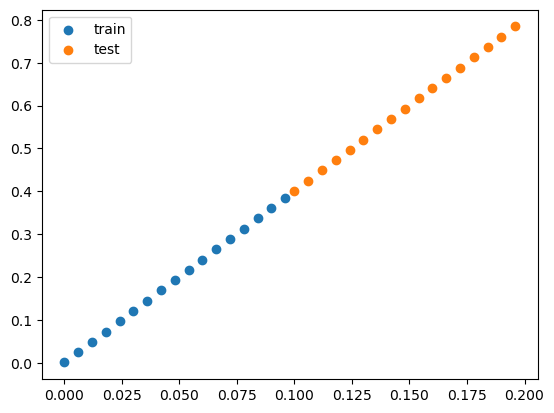

In [36]:
plot_each = 15

plt.scatter(X_train[::plot_each, 0], y_train[::plot_each], label='train')
plt.scatter(X_val[::plot_each, 0], y_val[::plot_each], label='test')
plt.legend();

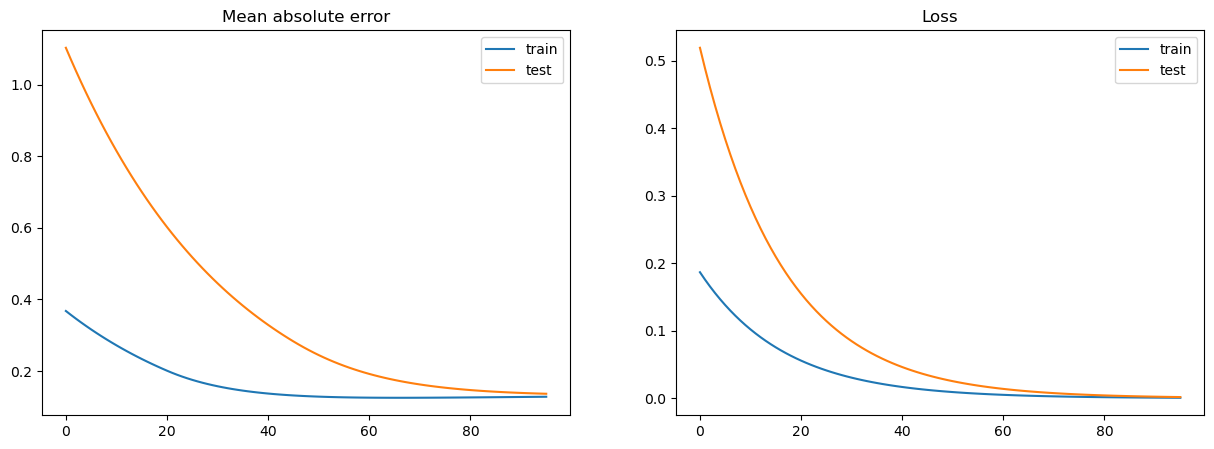

[[0.00035536]
 [0.00179044]
 [0.00322552]
 [0.00466059]
 [0.00609567]
 [0.00753075]
 [0.00896582]
 [0.0104009 ]
 [0.01183598]
 [0.01327106]]
[[0.01470613]
 [0.01614121]
 [0.01757629]
 [0.01901136]
 [0.02044644]
 [0.02188152]
 [0.0233166 ]
 [0.02475167]
 [0.02618675]
 [0.02762183]]
[[0.02905692]
 [0.03049199]
 [0.03192707]
 [0.03336215]
 [0.03479723]
 [0.0362323 ]
 [0.03766738]
 [0.03910246]
 [0.04053754]
 [0.04197261]]
[[0.04340775]
 [0.04484283]
 [0.04627791]
 [0.04771299]
 [0.04914807]
 [0.05058315]
 [0.05201823]
 [0.05345331]
 [0.05488839]
 [0.05632347]]
[[0.05775872]
 [0.05919381]
 [0.06062889]
 [0.06206397]
 [0.06349906]
 [0.06493414]
 [0.06636923]
 [0.06780431]
 [0.06923939]
 [0.07067448]]
[[0.07210998]
 [0.07354507]
 [0.07498017]
 [0.07641526]
 [0.07785035]
 [0.07928544]
 [0.08072053]
 [0.08215563]
 [0.08359072]
 [0.08502581]]
[[0.08646175]
 [0.08789685]
 [0.08933196]
 [0.09076707]
 [0.09220217]
 [0.09363728]
 [0.09507239]
 [0.09650749]
 [0.0979426 ]
 [0.0993777 ]]
[[0.10081433]

In [37]:
# define neural net
model = NN(MSELoss())

# add some layers
model.add_layer(LinearLayer(4, 1))

model = train(model, X_train, y_train, minibatch_size=10, epoch=100,
           learning_rate=0.01, X_val=X_val, y_val=y_val, verbose=True)

Если все получилось (лосс падает, ошибка падает), то микро-ура  
Теперь самое время начать работать с реальными данными

# Задача 5. Обучить нейросеть на реальных данных

In [38]:
import pandas as pd


DATA_URL = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(DATA_URL)

Постановки задачи следующая -- необходимо предсказать размер страховки для человека на основании собранных данных:
- возраст (age)
- пол (sex)
- индекс массы тела (bmi)
- количество детей (children)
- курильщик или нет (smoker)
- регион человека (region)  
----
Целевая переменная представлена в столбце `charges`

Смотрим на данные глазами

In [39]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Закодируем категориальные признаки через One Hot Encoding  
![](https://i.imgur.com/mtimFxh.png)  
Из каждого уникального значения категориального признака создается новый столбец с его значением  
Например, для признака `sex` есть два уникальных значения `{"female", "male"}`  
Мы создадим два новых столбца с названиями `sex_female` и `sex_male`, где будут представлены только 0 или 1, в зависимости от того, какого пола человек в выборке  
В библиотеке pandas это можно сделать через метод `pd.get_dummies()`

In [40]:
cat_columns = ['sex', 'smoker', 'region']
dummy_data = pd.get_dummies(data[cat_columns])
data.drop(cat_columns, axis=1, inplace=True)
data = pd.concat([data, dummy_data], axis=1)

In [41]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Посмотрим на распределение целевой переменной

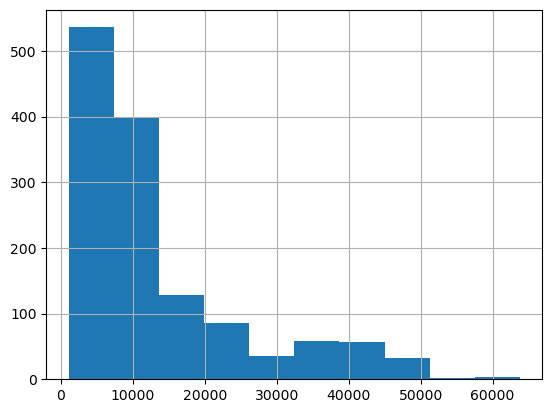

In [42]:
data['charges'].hist();

Есть очень большие значения целевой переменной, которые будут вызывать большой градиент  
Поэтому давайте будем предсказывать не прямое значение, а логарифм

In [43]:
data['charges_log'] = np.log(data['charges'])

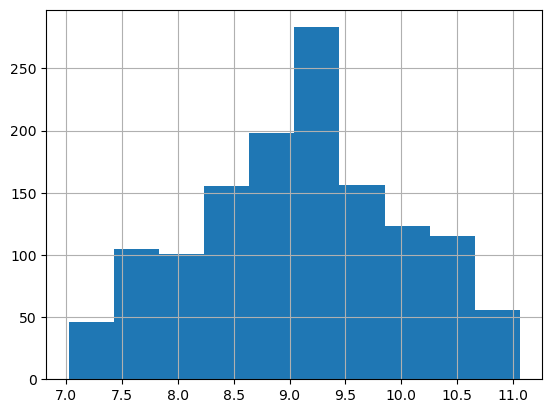

In [44]:
data['charges_log'].hist();

Удалим целевую переременную в сыром виде

In [45]:
data.drop(['charges'], axis=1, inplace=True)

Нейросети плохо работают с числовыми признаками в сыром виде, поэтому хорошо будет их отшаклировать тоже

In [46]:
def standart_scale_feature(feature_array):
    mean = np.mean(feature_array)
    std = np.std(feature_array)
    output = (feature_array - mean) / std
    return output

In [47]:
num_features = ["age", "bmi", "children"]
for feature in num_features:
    data[feature] = standart_scale_feature(data[feature])

In [48]:
data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges_log
0,-1.438764,-0.453320,-0.908614,1,0,0,1,0,0,0,1,9.734176
1,-1.509965,0.509621,-0.078767,0,1,1,0,0,0,1,0,7.453302
2,-0.797954,0.383307,1.580926,0,1,1,0,0,0,1,0,8.400538
3,-0.441948,-1.305531,-0.908614,0,1,1,0,0,1,0,0,9.998092
4,-0.513149,-0.292556,-0.908614,0,1,1,0,0,1,0,0,8.260197


Теперь формируем обучающую и тестовую выборки

In [49]:
y_name = 'charges_log'
X = data.drop([y_name], axis=1).to_numpy()
y = data[y_name].to_numpy().reshape(-1, 1)

In [50]:
print("X:")
print(X[:5])
print("y:")
print(y[:5])

X:
[[-1.43876426 -0.45332    -0.90861367  1.          0.          0.
   1.          0.          0.          0.          1.        ]
 [-1.50996545  0.5096211  -0.07876719  0.          1.          1.
   0.          0.          0.          1.          0.        ]
 [-0.79795355  0.38330685  1.58092576  0.          1.          1.
   0.          0.          0.          1.          0.        ]
 [-0.4419476  -1.30553108 -0.90861367  0.          1.          1.
   0.          0.          1.          0.          0.        ]
 [-0.51314879 -0.29255641 -0.90861367  0.          1.          1.
   0.          0.          1.          0.          0.        ]]
y:
[[9.73417643]
 [7.45330245]
 [8.40053847]
 [9.9980916 ]
 [8.26019685]]


In [51]:
print(X.shape)

(1338, 11)


Возьмем первые 1000 наблюдений для обучения модели, а оставшиеся для теста

In [52]:
split_idx = 1000
X_train = X[:split_idx]
y_train = y[:split_idx]
X_test = X[split_idx:]
y_test = y[split_idx:]

Теперь ваша задача натренировать нейросеть так, чтобы она научилась предсказывать размер страховки для конкретного человека

In [53]:
X_train.shape

(1000, 11)

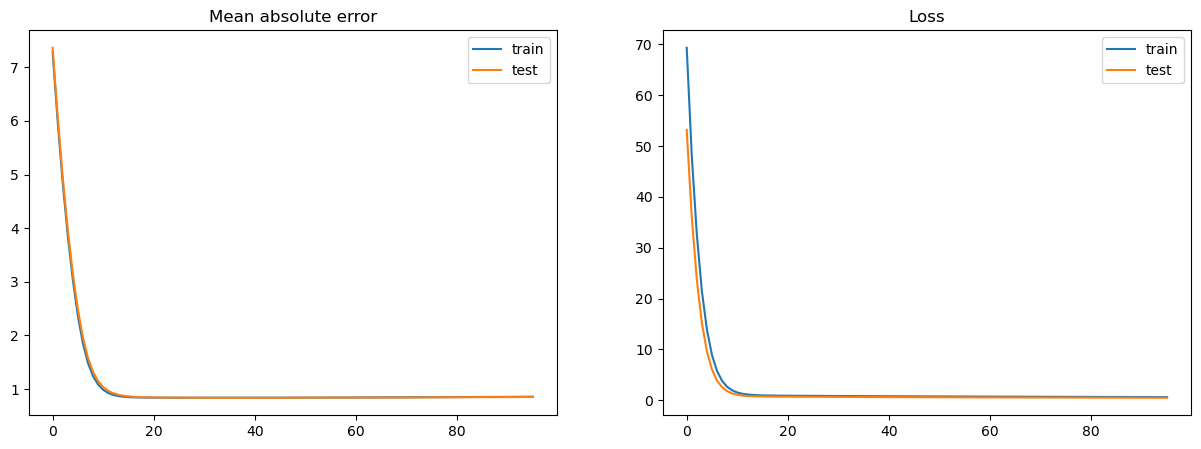

[[-2.91597933  1.46422815  5.70284346 ... -0.64742993 -0.10208902
  -5.26219819]
 [-3.15798543  0.32564691  1.29353506 ... -2.90541161 -1.66128156
  -2.80636765]
 [-1.37074555  0.16204022 -3.28357474 ... -0.84319119  0.44102803
   0.7239264 ]
 ...
 [-3.56475381  2.46510595  2.43133033 ... -0.69137701  0.24855446
  -3.13413268]
 [-2.87116225  1.45265776  5.76534949 ... -0.72712348 -0.11412633
  -5.28863055]
 [-1.36969396  1.33491986  1.50371013 ... -2.36094094  4.24144307
   0.55704147]]
[[0.05136928 0.81217851 0.99667463 ... 0.34356893 0.47449989 0.00515716]
 [0.04077778 0.58069983 0.78474493 ... 0.0518867  0.15959004 0.05698105]
 [0.20249942 0.54042165 0.03613899 ... 0.30086311 0.60850396 0.67347105]
 ...
 [0.02752489 0.92165913 0.91918541 ... 0.33372682 0.56182067 0.04172107]
 [0.05359767 0.81040713 0.99687549 ... 0.32582628 0.47149934 0.00502331]
 [0.2026693  0.79165327 0.81812718 ... 0.08620005 0.98581723 0.63576772]]
[[ 1.58604029  3.06147117  1.05585395  3.03884854  1.16664548]
 

[[9.72046435]
 [7.84227605]
 [7.78305485]
 [8.00548625]
 [9.27338014]
 [9.2227823 ]
 [9.2339336 ]
 [9.0984883 ]
 [9.85535417]
 [8.91728158]
 [9.16873102]
 [9.36298292]
 [9.76969637]
 [9.29413189]
 [7.88395713]
 [8.8369239 ]
 [9.16398672]
 [9.63276618]
 [8.61573457]
 [8.23671401]
 [9.20615935]
 [8.94165383]
 [9.84275562]
 [8.82760893]
 [9.82013995]
 [9.873321  ]
 [9.31865425]
 [8.29555716]
 [9.3208986 ]
 [9.63480035]
 [8.87197595]
 [9.74481909]
 [9.68879819]
 [9.02877407]
 [8.00096977]
 [9.47005573]
 [9.49829723]
 [9.45779046]
 [8.77374952]
 [9.82300307]
 [9.5069379 ]
 [8.71080927]
 [8.22155429]
 [9.24832261]
 [8.41890219]
 [9.3465687 ]
 [8.43922562]
 [8.06913495]
 [9.32987085]
 [9.80588966]
 [9.64777794]
 [8.87138051]
 [8.69211823]
 [9.55766029]
 [9.31653512]
 [9.51299605]
 [8.126309  ]
 [9.75943614]
 [8.75965514]
 [8.53713377]
 [9.60960956]
 [7.96916384]
 [8.9938431 ]
 [8.90148891]
 [7.45645945]
 [8.92599617]
 [9.72102277]
 [9.73911542]
 [9.39360729]
 [9.22976155]
 [9.63978428]
 [8.91

[[9.29060808]
 [8.72057609]
 [9.51449696]
 [9.554892  ]
 [8.19641692]
 [9.20154816]
 [9.33332001]
 [9.06225295]
 [9.49250473]
 [8.15676546]
 [9.52434011]
 [8.67233679]
 [9.29111994]
 [8.02867905]
 [7.77404579]
 [9.73397128]
 [9.19112858]
 [8.83678123]
 [9.50223146]
 [9.7533002 ]
 [9.73757239]
 [8.82439274]
 [9.37123668]
 [9.22970091]
 [9.26470182]
 [9.59534112]
 [9.45967652]
 [9.23543679]
 [9.27822473]
 [8.29192054]
 [9.73356698]
 [9.31314449]
 [9.03903058]
 [9.61066611]
 [8.96450968]
 [9.53217409]
 [8.84891397]
 [8.86938967]
 [9.70834931]
 [8.66036303]
 [9.6693723 ]
 [9.27113555]
 [8.58468993]
 [9.1726344 ]
 [9.30292386]
 [8.75662792]
 [9.02422455]
 [7.85321741]
 [9.24073766]
 [9.60047226]
 [8.88861124]
 [9.07490945]
 [8.1714619 ]
 [7.80081886]
 [8.36391476]
 [9.00357119]
 [9.09411362]
 [9.34620531]
 [8.97705241]
 [7.85887908]
 [8.76122178]
 [9.78598046]
 [9.67352479]
 [9.43813472]
 [8.46958389]
 [8.74614003]
 [9.70686186]
 [8.86313118]
 [9.57481917]
 [7.95616184]
 [8.7940302 ]
 [8.80

[[0.7275481  0.9818341  0.8914695  0.98291937 0.90457685]
 [0.88576429 0.96684321 0.85659482 0.94712217 0.98162153]
 [0.85549473 0.98510949 0.93501851 0.9692895  0.97236954]
 [0.8462523  0.98727698 0.94331029 0.97851116 0.97327167]
 [0.86458444 0.99015625 0.92061493 0.94123946 0.97301943]
 [0.80636475 0.79308549 0.66467415 0.90296579 0.7425887 ]
 [0.81912429 0.95939901 0.78900803 0.92593435 0.64762058]
 [0.74541687 0.9297879  0.63301312 0.93256816 0.77663075]
 [0.85693224 0.89459263 0.697001   0.93268561 0.78693591]
 [0.80273322 0.79096654 0.68789665 0.91139544 0.7672906 ]
 [0.75607561 0.99159828 0.91605703 0.92721076 0.9530931 ]
 [0.76519856 0.94723564 0.64104357 0.95656434 0.85077613]
 [0.81604194 0.96556574 0.90587824 0.87908166 0.92072622]
 [0.88731209 0.91769466 0.84260274 0.85543004 0.79004227]
 [0.87589719 0.96588649 0.91286652 0.82403446 0.90278636]
 [0.7160688  0.81183978 0.72856838 0.92537117 0.91423431]
 [0.8286828  0.96213704 0.87205561 0.84953108 0.90150884]
 [0.73235203 0

[[-3.81168277e-01  3.26433869e+00 -2.74880079e+00  3.32718901e-01
   2.98189964e+00  4.04743921e+00  1.23065553e+00  3.04528370e+00]
 [-4.59814691e+00 -2.65119120e-02 -7.86055901e-01  3.34763670e+00
  -4.84346119e+00 -1.39130439e+00 -1.02351549e+00 -3.18623942e+00]
 [-4.37726133e+00  5.60564106e-02  5.04124764e+00 -2.10133773e+00
  -4.44539278e+00 -4.03705751e+00 -1.92855834e-01 -5.80223551e+00]
 [-6.88270121e+00 -1.83306652e-02  1.47320442e+00  7.53537992e-01
  -4.28117301e+00 -6.24563301e-01  7.31542160e-01 -5.55188499e+00]
 [-1.31975042e+00  3.41918341e+00 -2.58324099e+00  7.25944262e+00
  -3.19789573e+00  3.32682641e-01  1.96290503e-02  4.10451274e+00]
 [ 1.76330829e+00  1.83891455e+00  2.40186849e-01  4.61571204e+00
  -4.11974126e-01 -2.93176480e+00 -1.00262908e+00  5.67471867e+00]
 [-6.09767792e-01  2.17013884e+00 -3.73723505e+00  1.20909819e+00
  -9.01067052e-01  1.04528972e+00 -1.09966491e-01  8.68573222e-01]
 [-1.25756888e+00  1.11859179e+00 -5.34203116e-01  4.71603426e+00
  -

[[0.84180033 0.98228263 0.91564932 0.91799558 0.96022816]
 [0.85643854 0.89388868 0.69500492 0.93199401 0.78661967]
 [0.87268299 0.97667343 0.89995108 0.94073603 0.96670896]
 [0.80607382 0.96553664 0.88867119 0.96389603 0.97757642]
 [0.6624454  0.91264595 0.58081705 0.96108201 0.86934741]
 [0.57707034 0.95840555 0.74754277 0.97649925 0.88782334]
 [0.88938398 0.99580231 0.9152865  0.84438726 0.9778611 ]
 [0.65121008 0.90750791 0.51013385 0.82283569 0.65885826]
 [0.88433655 0.96176771 0.88878581 0.76503696 0.95910006]
 [0.88439161 0.96380781 0.88869616 0.77189506 0.96166639]
 [0.83774745 0.99414866 0.9458212  0.93556449 0.94761395]
 [0.76594478 0.90953551 0.86064334 0.8996545  0.94268141]
 [0.79118707 0.99034928 0.89821976 0.94570192 0.9533195 ]
 [0.85163997 0.84908695 0.71228567 0.89392129 0.71082257]
 [0.89746455 0.99233943 0.91795203 0.96248374 0.98955087]
 [0.71630249 0.92111839 0.60889547 0.82388093 0.60630899]
 [0.85033884 0.98529703 0.92602951 0.98805968 0.97196106]
 [0.86496116 0

[[0.82933796 0.9551297  0.74160646 0.95456411 0.76284652]
 [0.82151929 0.82914252 0.6759839  0.87921843 0.72281029]
 [0.78604187 0.93190621 0.84263138 0.88618943 0.92946962]
 [0.78318642 0.81847253 0.78781575 0.91912811 0.8720561 ]
 [0.80430708 0.79996529 0.73723044 0.9128551  0.8453629 ]
 [0.74733182 0.94056485 0.68420276 0.96432545 0.87480277]
 [0.81520297 0.97599764 0.90337391 0.95359205 0.95023493]
 [0.62677327 0.98004027 0.84628347 0.96993743 0.92169752]
 [0.86256668 0.96465996 0.89367358 0.8055182  0.94309637]
 [0.82130288 0.96770637 0.91278282 0.97665262 0.97748764]
 [0.88632219 0.91802939 0.8494517  0.90060176 0.71327271]
 [0.89111398 0.99056659 0.94110399 0.97582492 0.97525184]
 [0.85579857 0.90474178 0.69597052 0.93885995 0.81646073]
 [0.86239501 0.97676244 0.88350182 0.92818329 0.95923662]
 [0.89382784 0.91277781 0.68780061 0.71014961 0.72597598]
 [0.80529627 0.91307998 0.71473395 0.96213371 0.85648346]
 [0.85885096 0.99043413 0.94191582 0.95471723 0.96401284]
 [0.87663206 0

[[-2.91798525  1.45880175  5.70198917 ... -0.64681437 -0.10215525
  -5.26265719]
 [-3.16005116  0.31223512  1.29253751 ... -2.90293963 -1.66369375
  -2.80773682]
 [-1.37201783  0.15365949 -3.28425982 ... -0.84118753  0.44019543
   0.72272803]
 ...
 [-3.56527129  2.44735331  2.43077553 ... -0.68772747  0.2451659
  -3.13576069]
 [-2.87323709  1.44765858  5.76448972 ... -0.72659187 -0.11408134
  -5.28906159]
 [-1.37175     1.33128598  1.50339897 ... -2.35993405  4.24335972
   0.55621856]]
[[0.05127162 0.81134934 0.9966718  ... 0.34370777 0.47448337 0.00515481]
 [0.04069706 0.57743073 0.78457638 ... 0.05200844 0.15926678 0.05690752]
 [0.20229403 0.53833947 0.03611513 ... 0.30128474 0.6083056  0.67320747]
 ...
 [0.02751104 0.92036769 0.91914419 ... 0.3345388  0.56098631 0.04165603]
 [0.05349252 0.80963783 0.99687281 ... 0.32594306 0.47151056 0.00502115]
 [0.20233725 0.79105327 0.81808087 ... 0.08627939 0.985844   0.63557714]]
[[ 1.57839963  3.05638396  1.05357472  3.04798145  1.16922211]
 [

[[-2.91798525  1.45880175  5.70198917 ... -0.64681437 -0.10215525
  -5.26265719]
 [-3.16005116  0.31223512  1.29253751 ... -2.90293963 -1.66369375
  -2.80773682]
 [-1.37201783  0.15365949 -3.28425982 ... -0.84118753  0.44019543
   0.72272803]
 ...
 [-3.56527129  2.44735331  2.43077553 ... -0.68772747  0.2451659
  -3.13576069]
 [-2.87323709  1.44765858  5.76448972 ... -0.72659187 -0.11408134
  -5.28906159]
 [-1.37175     1.33128598  1.50339897 ... -2.35993405  4.24335972
   0.55621856]]
[[0.05127162 0.81134934 0.9966718  ... 0.34370777 0.47448337 0.00515481]
 [0.04069706 0.57743073 0.78457638 ... 0.05200844 0.15926678 0.05690752]
 [0.20229403 0.53833947 0.03611513 ... 0.30128474 0.6083056  0.67320747]
 ...
 [0.02751104 0.92036769 0.91914419 ... 0.3345388  0.56098631 0.04165603]
 [0.05349252 0.80963783 0.99687281 ... 0.32594306 0.47151056 0.00502115]
 [0.20233725 0.79105327 0.81808087 ... 0.08627939 0.985844   0.63557714]]
[[ 1.57839963  3.05638396  1.05357472  3.04798145  1.16922211]
 [

[[ 1.88751576  5.23003209  2.96369114  2.98333215  3.05271635]
 [ 1.08913001  1.05559808  0.73146842  2.42118399  1.43347632]
 [ 0.89304457  2.43817318  0.41364706  1.42674327  0.35459124]
 [ 0.68545284  2.32980117  0.15891834  2.76147882  1.48713539]
 [ 1.65303758  3.03452062  2.31890501  1.65882937  2.49025172]
 [ 2.82060282  3.60919353  1.75753691  0.10075752  2.91786347]
 [ 1.51082548  3.42867239  2.11536303  1.85425714  2.2089587 ]
 [ 1.88058383  2.40402401  1.73133982  1.34182389  2.77536483]
 [ 2.46234419  4.27738011  2.46950499  3.71238282  4.00221664]
 [ 0.94166684  4.06877499  1.86644716  3.19416473  1.34713753]
 [ 1.67473595  3.42863553  2.00093211  1.19387104  2.17265004]
 [ 1.3937347   3.6234178   2.11817144  3.09262948  2.85047736]
 [ 2.52530362  4.50383011  2.07198992  2.37500026  5.01741243]
 [ 1.69115789  3.99502103  1.35217732  4.2448936   2.05477107]
 [ 1.13258729  1.05409871  0.73793822  2.40749884  1.53722519]
 [ 2.31404125  2.73012097  1.27038066  1.56404457  0.73

[[4.05805677e-01 9.63194971e-01 6.01395071e-02 5.82452114e-01
  9.51757538e-01 9.82835508e-01 7.74044785e-01 9.54565137e-01]
 [9.96924513e-03 4.90485405e-01 3.12917696e-01 9.66003107e-01
  7.80882993e-03 1.99573430e-01 2.63756938e-01 3.96502321e-02]
 [1.23818027e-02 5.12854740e-01 9.93572366e-01 1.09073452e-01
  1.16279034e-02 1.73570914e-02 4.51881221e-01 3.01018887e-03]
 [1.02486374e-03 4.91948575e-01 8.13504796e-01 6.79694091e-01
  1.36103626e-02 3.49387697e-01 6.74398266e-01 3.86128065e-03]
 [2.10815459e-01 9.67934693e-01 7.01989123e-02 9.99295758e-01
  3.91781385e-02 5.82994746e-01 5.04369616e-01 9.83748808e-01]
 [8.53147212e-01 8.64837395e-01 5.59581220e-01 9.90233900e-01
  4.00675101e-01 5.04300859e-02 2.69455313e-01 9.96582578e-01]
 [3.52121181e-01 8.96522981e-01 2.32566659e-02 7.69946468e-01
  2.88195073e-01 7.40352736e-01 4.71986766e-01 7.04200905e-01]
 [2.21032401e-01 7.53561520e-01 3.69410507e-01 9.91133865e-01
  5.66927551e-02 3.44799810e-02 5.37485054e-01 9.50833872e-01]


In [70]:
LEARNING_RATE = 1e-3
N_EPOCHS = 100

model = NN(MSELoss())

linear1 = LinearLayer(11, 8)
model.add_layer(linear1)

sigmoid1 = SigmoidLayer()
model.add_layer(sigmoid1)

linear2 = LinearLayer(8, 5)
model.add_layer(linear2)

sigmoid2 = SigmoidLayer()
model.add_layer(sigmoid2)

linear3 = LinearLayer(5, 1)
model.add_layer(linear3)

model = train(model, X_train, y_train, minibatch_size=128, epoch=N_EPOCHS,
           learning_rate=LEARNING_RATE, X_val=X_test, y_val=y_test, verbose=True)

Оценим работу модели

In [71]:
y_train_pred = model.predict(X_train)
mean_error_train = np.mean(abs(y_train - y_train_pred))
print(f"Средняя абсолютная ошибка на трейне: {mean_error_train:.3f}")

y_test_pred = model.predict(X_test)
mean_error_test = np.mean(abs(y_test - y_test_pred))
print(f"Средняя абсолютная ошибка на тесте: {mean_error_test:.3f}")

[[-2.91864152  1.45700783  5.70170523 ... -0.64662105 -0.10216184
  -5.26280237]
 [-3.16072315  0.30774385  1.29220649 ... -2.90212099 -1.66447629
  -2.80818739]
 [-1.37242937  0.15082409 -3.28448623 ... -0.84051669  0.43992616
   0.7223314 ]
 ...
 [-1.64301972  1.15228028 -1.1625831  ... -1.93300503  3.59204686
   4.06405341]
 [-0.4688794   1.78882984 -2.0732648  ...  0.42514469  2.48836152
  -0.12606881]
 [-5.21587955  0.22801182  0.01356378 ... -0.95606082  1.98989204
  -2.19880668]]
[[0.0512397  0.8110746  0.99667086 ... 0.34375138 0.47448173 0.00515406]
 [0.04067083 0.57633447 0.78452043 ... 0.05204881 0.15916202 0.05688335]
 [0.20222763 0.53763471 0.03610725 ... 0.30142597 0.60824144 0.6731202 ]
 ...
 [0.16205459 0.75992717 0.23819824 ... 0.12641834 0.97319633 0.9831109 ]
 [0.38488151 0.85678375 0.11172263 ... 0.60471367 0.92332188 0.46852448]
 [0.00540033 0.55675727 0.50339089 ... 0.27766758 0.87973172 0.0998577 ]]
[[1.57586094 3.05470591 1.05281436 3.05099541 1.1701086 ]
 [1.51

In [75]:
# Удобно сравнить, наверху расчет
print("Средняя абсолютная ошибка на трейне: 0.603")
print("Средняя абсолютная ошибка на тесте: 0.653")

Средняя абсолютная ошибка на трейне: 0.603
Средняя абсолютная ошибка на тесте: 0.653


У меня получилась средняя ошибка на трейне **0.766**, на тесте **0.835**  
**Эти значения надо побить** (ваши значения должны быть меньше моих)

Выше мы оценивали логарифмы, давайте оценим истинные значения

In [72]:
y_train_pred = model.predict(X_train)
y_train_pred_true_values = np.exp(y_train_pred)
y_train_true_values = np.exp(y_train)
mean_error_train = np.mean(abs(y_train_true_values - y_train_pred_true_values))
print(f"Средняя ошибка на трейне: {mean_error_train:.2f}")

y_test_pred = model.predict(X_test)
y_test_pred_true_values = np.exp(y_test_pred)
y_test_true_values = np.exp(y_test)
mean_error_test = np.mean(abs(y_test_true_values - y_test_pred_true_values))
print(f"Средняя ошибка на тесте: {mean_error_test:.2f}")

[[-2.91864152  1.45700783  5.70170523 ... -0.64662105 -0.10216184
  -5.26280237]
 [-3.16072315  0.30774385  1.29220649 ... -2.90212099 -1.66447629
  -2.80818739]
 [-1.37242937  0.15082409 -3.28448623 ... -0.84051669  0.43992616
   0.7223314 ]
 ...
 [-1.64301972  1.15228028 -1.1625831  ... -1.93300503  3.59204686
   4.06405341]
 [-0.4688794   1.78882984 -2.0732648  ...  0.42514469  2.48836152
  -0.12606881]
 [-5.21587955  0.22801182  0.01356378 ... -0.95606082  1.98989204
  -2.19880668]]
[[0.0512397  0.8110746  0.99667086 ... 0.34375138 0.47448173 0.00515406]
 [0.04067083 0.57633447 0.78452043 ... 0.05204881 0.15916202 0.05688335]
 [0.20222763 0.53763471 0.03610725 ... 0.30142597 0.60824144 0.6731202 ]
 ...
 [0.16205459 0.75992717 0.23819824 ... 0.12641834 0.97319633 0.9831109 ]
 [0.38488151 0.85678375 0.11172263 ... 0.60471367 0.92332188 0.46852448]
 [0.00540033 0.55675727 0.50339089 ... 0.27766758 0.87973172 0.0998577 ]]
[[1.57586094 3.05470591 1.05281436 3.05099541 1.1701086 ]
 [1.51

In [74]:
# Удобно сравнить, наверху расчет
print("Средняя ошибка на трейне: 7297.77")
print("Средняя ошибка на тесте: 8099.49")

Средняя ошибка на трейне: 7297.77
Средняя ошибка на тесте: 8099.49


У меня получилась средняя ошибка на трейне **8090.09**, на тесте **9007.43**  
**Эти значения тоже надо побить** (ваши значения должны быть меньше моих)

Оценим среднюю абсолютную процентную ошибку (метрика называется MAPE)

In [76]:
def mape_count(y_true, y_pred):
    return np.mean((abs(y_true - y_pred) / y_true) * 100)

In [77]:
mape_train = mape_count(y_train_true_values, y_train_pred_true_values)
mape_test = mape_count(y_test_true_values, y_test_pred_true_values)
print(f"MAPE train: {mape_train:.2f}%")
print(f"MAPE test: {mape_test:.2f}%")

MAPE train: 63.40%
MAPE test: 61.82%


У меня получилось MAPE на трейне **95.11%**, на тесте **89.10%**  
**Эти значения надо побить** (ваши значения должны быть меньше моих)

## Если все получилось, то я вас поздравляю :)

![](http://sun9-16.userapi.com/impf/c840737/v840737590/55ded/Ns6wztlxubY.jpg?size=604x466&quality=96&sign=e4647d7e87db4c211d138163f60ea33b&type=album)  
плюс за то, что завершил(а) эту лабу

P.S. ниже есть _необязательная_ задача для жаждущих еще поупражняться

# Задача 6\*. Попробуйте сделать настоящий линейный слой
То есть добавить еще и вектор смещений B, и написать соответствующий функционал в `forward` и `backward` методах  
Далее собрать из нейросеть при помощи полноценных линейных слоев и посмотреть, улучшится ли качество при таком подходе